## 2-11. 프로젝트(1) load_digits : 손글씨 분류
1. 필요한 모듈 import하기
2. 데이터 준비
3. 데이터 이해하기
  * Feature Data 지정하기
  * Label Data 지정하기
  * Target Names 출력해 보기
  * 데이터 Describe 해 보기
4. train, test 데이터 분리
5. 다양한 모델로 학습시켜보기
  * Decision Tree 사용해 보기
  * Random Forest 사용해 보기
  * SVM 사용해 보기
  * SGD Classifier 사용해 보기
  * Logistic Regression 사용해 보기
6. 모델을 평가해 보기
  학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
data[100] #이미 normalize가 되어 있는 데이터

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

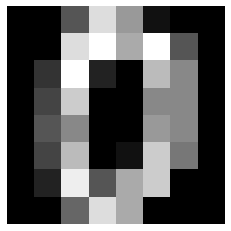

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

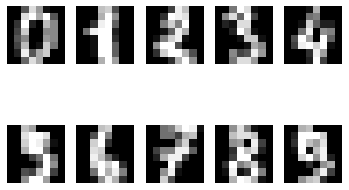

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [20]:
label = digits.target
print(label.shape)
label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
import numpy as np
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [24]:
y_test

array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
       2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
       3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
       8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
       2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
       8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
       2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
       7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
       1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
       2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
       8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
       0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
       2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
       6, 2, 6, 9, 5, 3, 7, 9, 3, 8, 5, 0, 5, 3, 3,

In [31]:
np.bincount(y_test)

array([31, 38, 38, 27, 41, 35, 38, 34, 35, 43])

### 도수분포도 (histogram)

In [28]:
_, bins=np.histogram(data, bins=10)
np.histogram(y_test, bins=10)

(array([31, 38, 38, 27, 41, 35, 38, 34, 35, 43]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

Text(0.5, 1.0, 'y_test')

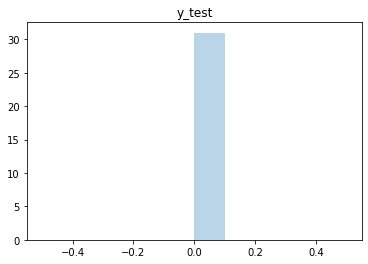

In [29]:
import matplotlib.pyplot as plt
plt.hist(y_test,bins=bins, alpha=0.3)
plt.title('y_test')

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=15)

In [10]:
model = DecisionTreeClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



### Random Frest

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



### SVM

In [12]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### SGD Classifier

In [13]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.88      0.95      0.91        38
           2       0.95      1.00      0.97        38
           3       0.90      0.96      0.93        27
           4       0.95      0.93      0.94        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.89      1.00      0.94        34
           8       1.00      0.89      0.94        35
           9       0.97      0.88      0.93        43

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression()
model = LogisticRegression(random_state=32, solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.90      0.95      0.92        38
           2       1.00      0.97      0.99        38
           3       0.96      0.89      0.92        27
           4       0.98      0.98      0.98        41
           5       0.97      0.97      0.97        35
           6       1.00      1.00      1.00        38
           7       0.94      1.00      0.97        34
           8       0.91      0.91      0.91        35
           9       0.93      0.93      0.93        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## 결과분석

평가지표 : accuracy

숫자 이미지의 분류는 많이 맞추는 것이 중요하니 전체 데이터 중 올바르게 판단한 데이터 개수의 비율로 표시되는 accuracy가 중요함.

Decision Tree만 정확도가 낮은 데 이것은 어떤 feature에 따라 의존관계가 있는 label을 찾는 decision tree 기법에 이미지 분류는 잘 작동하지 않는 것으로 보인다. 각 픽셀이 모두 feature가 되기 때문에 erminal 노드 수가 많으면 예측성능이 떨어지는 dicision tree기법의 특성에 기인한다고 본다.